In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from qutip import (fock, coherent, basis, destroy, qeye, tensor, wigner, mesolve, ptrace)

### Static

In [2]:
xvec = np.linspace(-5, 5, 200)

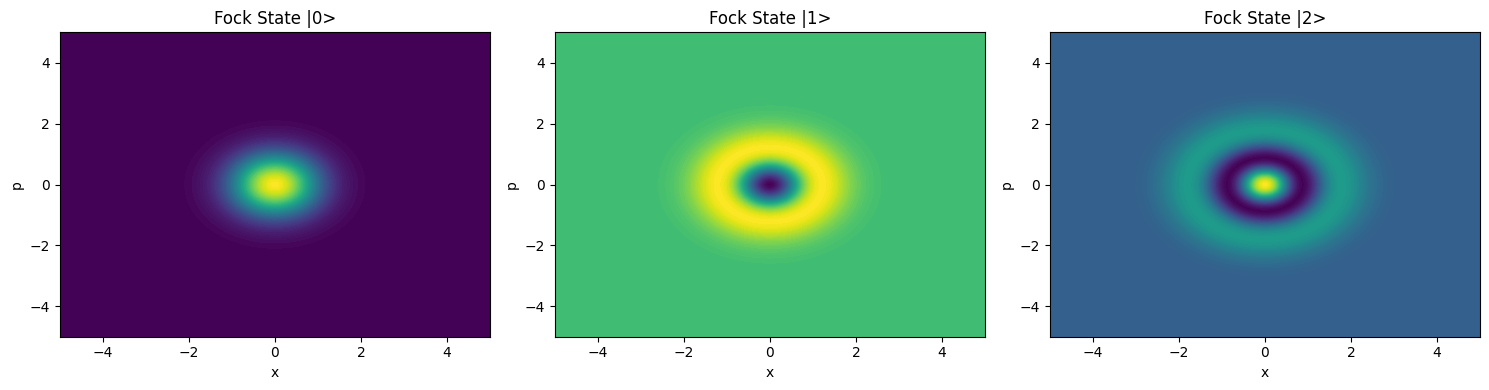

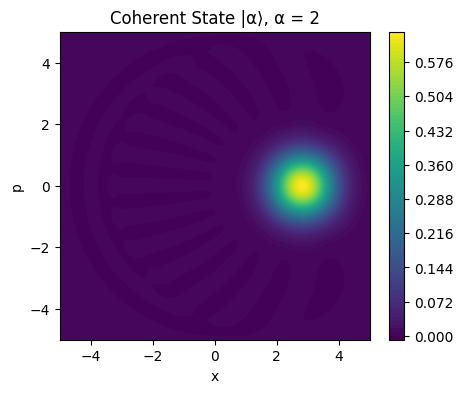

In [3]:
alpha = 2.0 
hilbert_dim = 15 # truncation we're picking
psi_coh = coherent(15, alpha)
W_coh = wigner(psi_coh, xvec, xvec)

# Fock States
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, n in enumerate([0, 1, 2]):
    psi_n = fock(hilbert_dim, n)
    W_n = wigner(psi_n, xvec, xvec)
    cs = axs[i].contourf(xvec, xvec, 2 * W_n, 100)
    axs[i].set_title(f"Fock State |{n}>")
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('p')
plt.tight_layout()
plt.show()

# Coherent State
plt.figure(figsize=(5, 4))
plt.contourf(xvec, xvec, 2 * W_coh, 100)
plt.title("Coherent State |α⟩, α = 2")
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar()
plt.show()

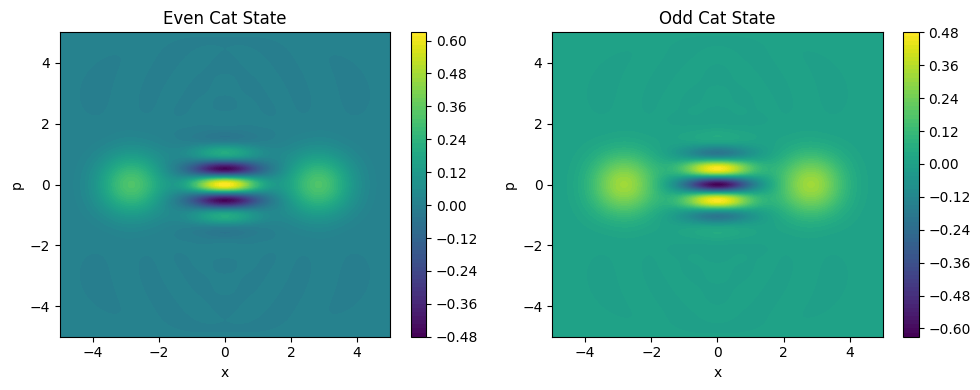

In [4]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

psi_odd = (coherent(15, alpha) - coherent(15, -alpha)).unit()
psi_even = (coherent(15, alpha) + coherent(15, -alpha)).unit()
W_even = wigner(psi_even, xvec, xvec)
W_odd = wigner(psi_odd, xvec, xvec)

# Plot even cat state
cs1 = ax1.contourf(xvec, xvec, 2 * W_even, 100)
ax1.set_title("Even Cat State")
ax1.set_xlabel('x')
ax1.set_ylabel('p')
plt.colorbar(cs1, ax=ax1)

# Plot odd cat state
cs2 = ax2.contourf(xvec, xvec, 2 * W_odd, 100)
ax2.set_title("Odd Cat State")
ax2.set_xlabel('x')
ax2.set_ylabel('p')
plt.colorbar(cs2, ax=ax2)

plt.tight_layout()
plt.show()

### Simulation

In [6]:
# Hilbert space truncation for each mode
N_a = 20  # memory mode
N_b = 10  # buffer mode

# Define annihilation operators for each mode in the tensor product space
a = tensor(destroy(N_a), qeye(N_b))
b = tensor(qeye(N_a), destroy(N_b))

# Parameters
g2 = 1.0
epsilon_b = -4.0
kappa_b = 10.0

# Hamiltonian construction
# Note: Since g2 and epsilon_b are real, their complex conjugates are the same.
H = g2 * (a**2 * b.dag()) + g2 * (a.dag()**2 * b) + epsilon_b * b.dag() + epsilon_b * b


# Initial state: both modes in vacuum
psi0 = tensor(fock(N_a, 0), fock(N_b, 0))

# Collapse operator corresponding to decay on mode b
c_ops = [np.sqrt(kappa_b)*b]

t_f = 4.0
num_steps = 40
tlist = np.linspace(0, t_f, num_steps)

result = mesolve(H, psi0, tlist, c_ops, [])

/home/haadi/yq25_alice-bob_challenge/.venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


GIF saved as dissipative_cat_wigner.gif


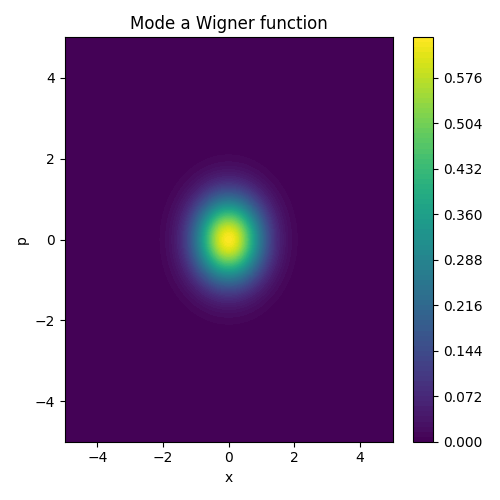

In [8]:
from IPython.display import Image, display

frames = []

# Loop over the time-evolved states
for state in result.states:
    # Partial trace over mode b to obtain reduced state for mode a
    rho_a = ptrace(state, 0)
    W_a = wigner(rho_a, xvec, xvec)
    
    # Plot the Wigner function for mode a
    fig, ax = plt.subplots(figsize=(5, 5))
    cont = ax.contourf(xvec, xvec, 2 * W_a, 100)
    ax.set_title("Mode a Wigner function")
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.colorbar(cont, ax=ax)
    plt.tight_layout()
    
    # Render the figure to an image (in-memory)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[1], fig.canvas.get_width_height()[0], 4)[:,:,:3]
    frames.append(img)
    plt.close(fig)

# Save frames as a GIF file; adjust the duration (seconds per frame) as desired.
gif_filename = "dissipative_cat_wigner.gif"
imageio.mimsave(f'../images/{gif_filename}', frames, duration=0.2)
print(f"GIF saved as {gif_filename}")

# Display the GIF in the notebook
display(Image(filename=f'../images/{gif_filename}'))